## Investigating the numpy.random package

![numpy.jpg](numpy.jpg)
[NumPy](http://www.numpy.org/) (which stands for Numerical Python) is a library for the Python programming language, that adds support for huge multi-dimensional arrays and matrices of numbers. It also provides a large collection of high-level mathematical functions to operate on these arrays, and executes much faster than standard Python for this. It is an open source project and free to import, generally labelled in Python code as "np". It is part of the [SciPy](https://scipy.org/) ecosystem for Python, which also includes such libraries as pandas and matplotlib.

Randomly generated data is important in [various kinds of statistical research as well as aspects of computer science such as simulation and cryptography](https://en.wikipedia.org/wiki/Random_number_generation) and other areas where unpredictable results are necessary, for example, lottery-gaming, draws and slot machines. In the case of statistical research, such as surveys that are based on a representative sample of a population (where it would not be feasible to survey an entire nation, for example!) a [probability sampling method](https://www.statisticshowto.datasciencecentral.com/probability-sampling/) can be designed to ensure that each member of a specific population has a known and equal chance of being included in a random sample.  Random sampling provides an unbiased interpretation of results. According to Jason Brownlee in his [Machine Learning Mastery blog](https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/) "the use of randomness is an important part of the configuration and evaluation of machine learning algorithms. From the random initialization of weights in an artificial neural network, to the splitting of data into random train and test sets, to the random shuffling of a training dataset in stochastic gradient descent, generating random numbers and harnessing randomness is a required skill". Random sampling is an essential element of machine learning research - it aids in creating algorithms for predicting models, pattern recognition and language processing. NEED REFERENCES

[numpy.random](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html) is a submodule of the NumPy package that is used to generate random (or indeed, pseudorandom) numbers, using  an algorithm called the [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister), a pseudorandom number generator (PRNG).  This means that numpy.random can provide numbers that appear to be unpredictable and undetermined, but that it actually does not generate numbers that are random in the *truest* sense of the term, rather it's sequence is based on random seed generation, which I'll discuss later in this assignment.  Python itself also utilises this PRNG in it's own [random](https://docs.python.org/3/library/random.html) module but numpy.random allows for randomly generated [ndarrays](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.html), which means more powerful randomly generated data structures can be derived in a more efficient way using numpy.random.   

## Simple random data

I decided to try out some of the various functions that are part of the numpy.random submodule to see if running and testing them could help me to understand what each of them does. 

The first function in the list is **random.rand**, which according to the NumPy manual will [create an array of the given shape and populate it with random samples](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.rand.html#numpy.random.rand) from a uniform distribution over [0,1)] I understand this to mean that this function will display an array (which is almost like a table or database, consisting of rows and columns) of floats based on a shape defined by parmeters given by the user to determine the dimensions of the array, but that the content will consist of floats that range between 0 to 0.99 (i.e. up to but not including 1), in a [uniform distribution](https://www.investopedia.com/terms/u/uniform-distribution.asp) (which means that the probability of all outcomes have exactly the same possibility of happening). 

In [1]:
import numpy as np
np.random.rand(4,3)

array([[0.09107518, 0.75369017, 0.78060545],
       [0.35207868, 0.91769776, 0.82144906],
       [0.33900433, 0.07970911, 0.78865187],
       [0.21989018, 0.29082262, 0.61918595]])

I can see from the above that an array of 4 rows and 3 columns has been created, all with randomly selected values that range from 0 to 0.99999999.  

Following from this is the **randn()** function, that [generates an array filled with random floats sampled from a univariate “normal” (Gaussian) distribution of mean 0 and variance 1](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html#numpy.random.randn), which involved quite a bit of Gooling to try to understand! [Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution) confirms that the Gaussian distribution is also know as "normal" distribution and "the bell curve".  I read [a post on stackoverflow.com](https://stackoverflow.com/questions/10138085/python-pylab-plot-normal-distribution) that suggested using [Seaborn](https://seaborn.pydata.org/) for plotting a graph that displays this so I tried it out.

C:\Users\Aideen and Ken\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


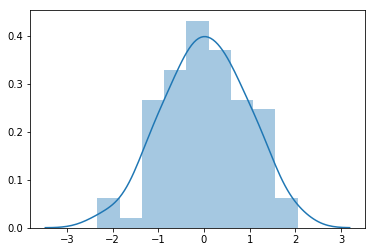

In [25]:
import seaborn as sns
value = np.random.randn(100)
sns.distplot(value)

This graph displays a bell-shaped curve, centered at zero, which is typical of the normal distribution, as [the shape of the normal distribution is completely described by the mean and the standard deviation](https://stattrek.com/online-calculator/normal.aspx). 

The next function to try is **randint**, and I borrowed the below code from the Numpy documentation. 

In [30]:
np.random.randint(2, size=10)

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 0])

An array of 10 integers indexed from 0 to 1 (i.e. count of 2) has been generated and again, the NumPy documentation gave some detail on the distribution of the data created by this function and states that it is of the "discrete uniform" distribution.  To see what this might mean I decided to run this function again but also plot the output, using matplotlib.

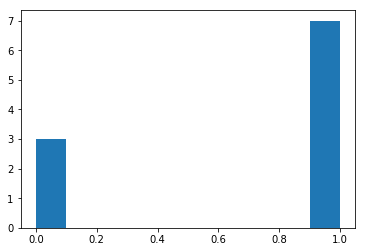

In [32]:
x = np.random.randint(2, size=10)
import matplotlib.pyplot as plt
plt.hist(x)
plt.show()

The above histogram shows the amount of times that either  integer 0 or 1 has been randomly generated by the function. As the distribution of these is discrete uniform, each integer has an equal probability of being chosen in the 10 picks. 


I noticed from the [Numpy documentation page on numpy.random](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html) that the next four functions (**random_sample**, **random**, **ranf**, and **sample** functions) all return random floats in the half open interval (again from 0.0 up to but not including 1.0) in the "continuous uniform" distribution.  

![random.jpg](random.jpg)

The distribution difference with this function is that "the probability that a continuous random variable will assume a particular value is zero".  I borrowed from the example code in the NumPy documentation again and to gain more understanding of the distribution, I plotted these results too.

<function matplotlib.pyplot.show(*args, **kw)>

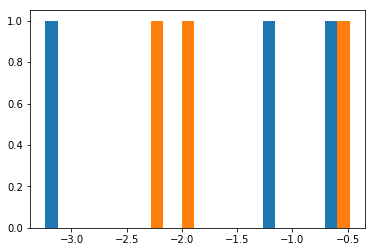

In [36]:
%matplotlib inline 
y = 5 * np.random.random_sample((3, 2)) - 5
plt.hist(y)
plt.show

## Permutations
The Permutations functions of numpy.random are [shuffle(x)](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.shuffle.html) and [permutation(x)](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.permutation.html#numpy.random.permutation).  

Both of these functions relate to re-arranging provided random data. The shuffle(x) function shuffles data on the first axis of a multi-dimensional array, where the order of sub-arrays is changed but the contents remain the same:


### Multi Dimensional Array

In [7]:
#example from https://www.science-emergence.com/Articles/How-to-randomly-shuffle-an-array-in-python-using-numpy/ 
import numpy as np
M = np.array([[1,2,3],[4,5,6],[7,8,9]])
np.random.shuffle(M)
M

array([[4, 5, 6],
       [7, 8, 9],
       [1, 2, 3]])

As you can see above, the sequence that the sets are displayed in has been shuffled, but the numbers inside the brackets have remained in the same order they were originally written in.

### 1 Dimensional Array
With an array that is 1 Dimensional, the shuffle(x) function 

In [8]:
#example from https://www.science-emergence.com/Articles/How-to-randomly-shuffle-an-array-in-python-using-numpy/ 
import numpy as np
M = np.array([4,8,15,16,23,42])
np.random.shuffle(M)
M

array([15, 42,  4, 23, 16,  8])

As you can see above, the sequence that the sets are displayed in has been shuffled, but the contents inside the brackets have remained in the same order.

The permutation(x) function however, when given an array, takes a copy and shuffles the elements randomly. 

In [9]:
#example using an array from https://www.w3cschool.cn/doc_numpy_1_10/numpy_1_10-generated-numpy-random-permutation.html
import numpy as np
array = np.random.permutation([1, 4, 9, 12, 15])
array

array([ 1,  9,  4, 12, 15])

In the case of an integer, the permutation function randomly permutes it's range:

In [10]:
#example using an integer 
import numpy as np
integer = np.random.permutation(8)
integer

array([0, 4, 5, 6, 1, 2, 3, 7])

## Distributions
From a practical perspective, we can think of a distribution as a function that describes the relationship between observations in a sample space. (https://machinelearningmastery.com/statistical-data-distributions/) 

## Random Seed

In programming, randomly generated numbers can be used to test and debug code, but it is important to have consistency in the tests, so for this reason, fixing the seed of the random module can help. (http://hplgit.github.io/scipro-primer/slides/random/html/random-reveal.html) https://stackoverflow.com/questions/5836335/consistently-create-same-random-numpy-array
http://wwwcp.tphys.uni-heidelberg.de/Polymer/day2/random_numbers/p2.htm 

## References
1. [NumPy](http://www.numpy.org/)
2. [SciPy](https://scipy.org/)
3. [Random Number Generation](https://en.wikipedia.org/wiki/Random_number_generation)
4. [Probability Sampling Method](https://www.statisticshowto.datasciencecentral.com/probability-sampling/)
5. [How to Generate Random Numbers in Python](https://machinelearningmastery.com/how-to-generate-random-numbers-in-python/) 
6. [Numpy.random User Documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.random.html)
7. [Mersenne Twister](https://en.wikipedia.org/wiki/Mersenne_Twister)
8. [Python random module](https://docs.python.org/3/library/random.html)
9. [ndarrays](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.ndarray.html)
10.
